In [1]:
# Import libraries
import pandas as pd

In [2]:
#Load the CSV files
df_part1 = pd.read_csv('ovhc_insurance_part1.csv')
df_part2 = pd.read_csv('ovhc_insurance_part2.csv')

In [3]:
#Combine the dataframes
df_combined = pd.concat([df_part1, df_part2], ignore_index=True)

In [4]:
#Save the combined dataframe to a new CSV
df_combined.to_csv('combined_ovhc_insurance.csv', index=False)

In [5]:
#Inspect the combined dataframe
df_combined.head()

,Company,Visa Types,ED Payment Method,Children <12 Covered,Coverage Details,Monthly Premium (AUD)
0,Medibank,"600, 601, 651, 417, 462",Direct billing with network providers; otherwi...,Yes,"Hospital, GP visits, emergency, ambulance",From $88.88/month (Starter Plan)
1,Bupa,"600, 485, 417, 462, others",Direct billing with Bupa hospitals and provide...,"Yes, included in couple or family plans","Hospital, specialist, emergency, ambulance, pa...",From $82.10/month (Basic Visitors Cover)
2,Allianz Care Australia,"600, 482, 485, 417, 462",Direct billing at partner hospitals; reimburse...,"Yes, covered under family plans","Inpatient, outpatient, ambulance, emergency, d...",From $78/month (Budget Working Visa Cover)
3,nib,"600, 482, 485, 417, 462","Direct billing with nib First Choice network, ...","Yes, under family/couple policies","Emergency, hospital, GP, ambulance, limited de...",From $81.25/month (Visitors Plus policy)
4,ahm (by Medibank),"600, 482, 485, others",Reimbursement mostly; some direct billing for ...,"Yes, family cover available","Hospital, emergency, some extras with higher p...",From $83.40/month (Basic policy)


In [6]:
#Data cleaning

# Clean the Monthly Premium column to remove text and convert to float
# Remove any non-numeric characters and retain only the numeric part
df_combined['Monthly Premium (AUD)'] = df_combined['Monthly Premium (AUD)'].replace(
    r'[^\d.]', '', regex=True).astype(float)


In [7]:
df_combined.head()

,Company,Visa Types,ED Payment Method,Children <12 Covered,Coverage Details,Monthly Premium (AUD)
0,Medibank,"600, 601, 651, 417, 462",Direct billing with network providers; otherwi...,Yes,"Hospital, GP visits, emergency, ambulance",88.88
1,Bupa,"600, 485, 417, 462, others",Direct billing with Bupa hospitals and provide...,"Yes, included in couple or family plans","Hospital, specialist, emergency, ambulance, pa...",82.10
2,Allianz Care Australia,"600, 482, 485, 417, 462",Direct billing at partner hospitals; reimburse...,"Yes, covered under family plans","Inpatient, outpatient, ambulance, emergency, d...",78.00
3,nib,"600, 482, 485, 417, 462","Direct billing with nib First Choice network, ...","Yes, under family/couple policies","Emergency, hospital, GP, ambulance, limited de...",81.25
4,ahm (by Medibank),"600, 482, 485, others",Reimbursement mostly; some direct billing for ...,"Yes, family cover available","Hospital, emergency, some extras with higher p...",83.40


In [8]:
# Check for missing values
missing_values = df_combined.isnull().sum()

# Output the data cleaning results
print("Missing Values in DataFrame:")
print(missing_values)

Missing Values in DataFrame:
Company                  0
Visa Types               0
ED Payment Method        0
Children <12 Covered     0
Coverage Details         0
Monthly Premium (AUD)    0
dtype: int64


In [9]:
#Data Analysis

# Get the average premium
average_premium = df_combined['Monthly Premium (AUD)'].mean()

# Get the most common ED Payment Method
common_ed_payment_method = df_combined['ED Payment Method'].mode()[0]

# Get the unique visa types
unique_visa_types = df_combined['Visa Types'].unique()

# Output the analysis results
print("\nData Analysis Results:")
print(f"Average Monthly Premium (AUD): {average_premium:.2f}")
print(f"Most Common ED Payment Method: {common_ed_payment_method}")
print(f"Unique Visa Types Available: {', '.join(unique_visa_types)}")


Data Analysis Results:
Average Monthly Premium (AUD): 79.91
Most Common ED Payment Method: Direct billing at CBHS partner hospitals; otherwise reimbursed
Unique Visa Types Available: 600, 601, 651, 417, 462, 600, 485, 417, 462, others, 600, 482, 485, 417, 462, 600, 482, 485, others, 482, 485, 600, 601, 482, 600, 417, 485, 600, 482, 485, 417, 600, 482, 485, 408, 417


In [10]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
#Set the style for the plots
sns.set(style="whitegrid")

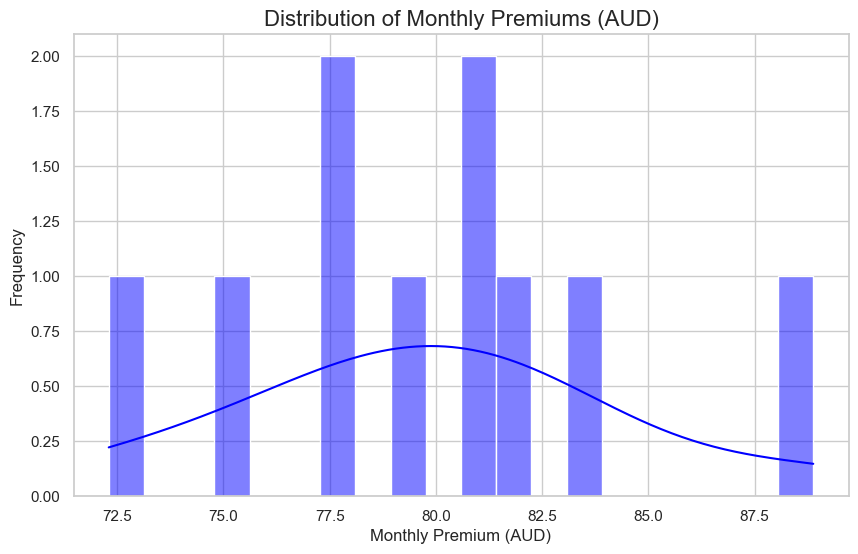

In [12]:
#Visualize the distribution of Monthly Premiums. Helps understand the spread of premium costs.

plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Monthly Premium (AUD)'], kde=True, bins=20, color='blue')
plt.title('Distribution of Monthly Premiums (AUD)', fontsize=16)
plt.xlabel('Monthly Premium (AUD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

/var/folders/g_/gpmbk_kx47774ckqqb1kt2b40000gn/T/ipykernel_35971/672658228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_premium_by_company.index, y=avg_premium_by_company.values, palette='viridis')


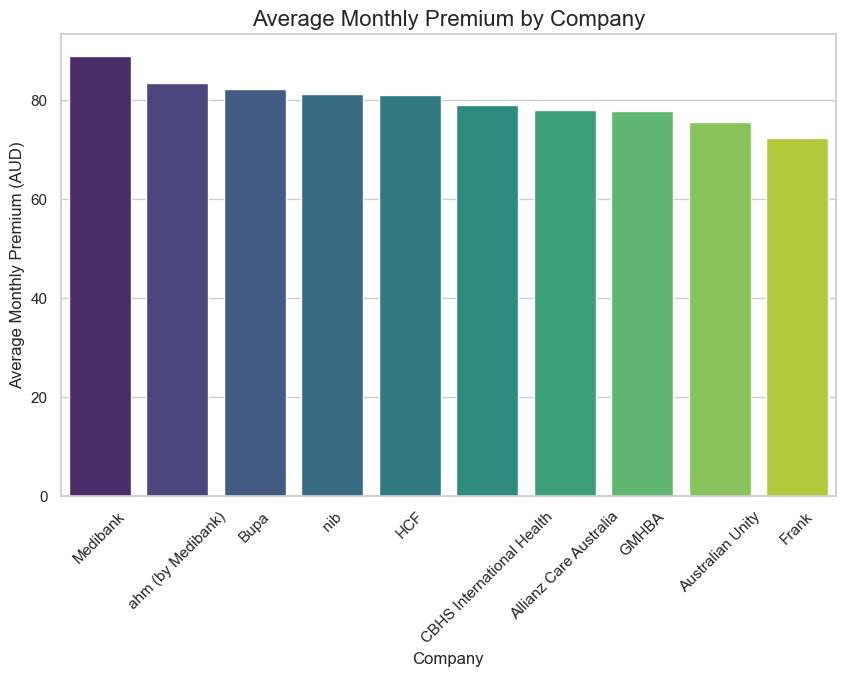

In [13]:
#Average Premium by Company. Offers insights into which company offers the best value.
plt.figure(figsize=(10, 6))
avg_premium_by_company = df_combined.groupby('Company')['Monthly Premium (AUD)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_premium_by_company.index, y=avg_premium_by_company.values, palette='viridis')
plt.title('Average Monthly Premium by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Monthly Premium (AUD)', fontsize=12)
plt.xticks(rotation=45)

#save the plot
plt.savefig('company_offers_best_value.png')
plt.show()


/var/folders/g_/gpmbk_kx47774ckqqb1kt2b40000gn/T/ipykernel_35971/3016045937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x='Visa Types', palette='Set2', order=df_combined['Visa Types'].value_counts().index)


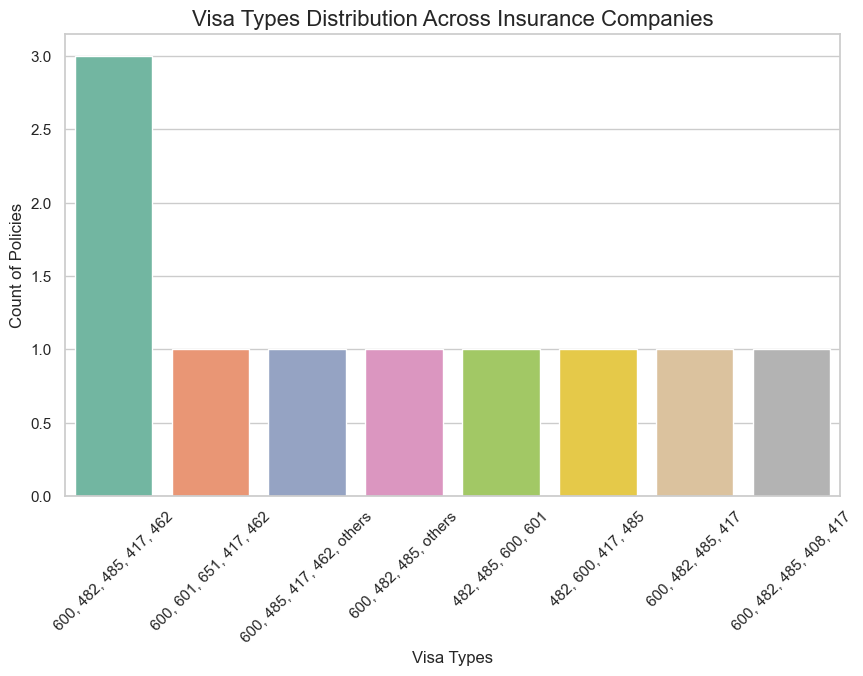

In [14]:
#Visa Types Distribution. Helps to know which visa types are widely supported.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='Visa Types', palette='Set2', order=df_combined['Visa Types'].value_counts().index)
plt.title('Visa Types Distribution Across Insurance Companies', fontsize=16)
plt.xlabel('Visa Types', fontsize=12)
plt.ylabel('Count of Policies', fontsize=12)
plt.xticks(rotation=45)
plt.show()